In [1]:
from __future__ import print_function

import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import struct
import numpy as np
%matplotlib inline

def calcPSNR(ref, img):
    shape = img.shape
    imgVec = img.reshape((shape[0] * shape[1] * shape[2]))
    refVec = ref.reshape((shape[0] * shape[1] * shape[2]))
    mse = np.mean(np.square(np.subtract(refVec, imgVec)))
    return (20 * np.log10(np.max(refVec)) - 10 * np.log10(mse), mse)

import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import sys
from keras.preprocessing.image import ImageDataGenerator

from model import seg,unet,DMCNN,HDRDMCNN
import numpy as np
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping,TerminateOnNaN
from scipy import misc
from keras.callbacks import TensorBoard
import math
import cv2 as cv
import tools.img2raw as im

import tensorflow as tf

models = []

Using TensorFlow backend.


In [2]:
model = DMCNN.dmcnn(128,128,3)
model.load_weights("weight/DMCNN-0.001-27000-128-2019-11-20-03-40-44.h5")
models.append(model)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     31232     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 3)       4803      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 3)       12        
Total params: 44,303
Trainable params: 44,303
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = HDRDMCNN.HDRdmcnn_nonHDR(128,128,3)
model.load_weights("weight/HDRDMCNN-0.0005-27000-128-2019-11-20-21-28-58.h5")
models.append(model)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 128)     31232     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 64)      8256      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 3)       4803      
Total params: 44,291
Trainable params: 44,291
Non-trainable params: 0
_________________________________________________________________
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None,

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
model_2 (Model)                 (None, 128, 128, 3)  44291       input_2[0][0]                    
__________________________________________________________________________________________________
model_3 (Model)                 (None, 128, 128, 3)  1941151     input_2[0][0]                    
__________________________________________________________________________________________________
add_1 (Add)                     (None, 128, 128, 3)  0           model_2[1][0]                    
                                                                 model_3[1][0]              

In [4]:
model = DMCNN.dmcnn(128,128,3)
model.load_weights("weight/DMCNN-XTRANS-0.001-27000-128-2019-12-02-21-28-13.h5")
models.append(model)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 128, 128, 128)     31232     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 128, 128, 64)      8256      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 128, 128, 3)       4803      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 128, 128, 3)       12        
Total params: 44,303
Trainable params: 44,303
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = HDRDMCNN.HDRdmcnn_nonHDR(128,128,3)
model.load_weights("weight/HDRDMCNN-XTRANS-0.0005-27000-128-2019-12-03-14-26-44.h5")
models.append(model)

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 128, 128, 128)     31232     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 128, 128, 64)      8256      
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 128, 128, 3)       4803      
Total params: 44,291
Trainable params: 44,291
Non-trainable params: 0
_________________________________________________________________
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None,

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
model_6 (Model)                 (None, 128, 128, 3)  44291       input_6[0][0]                    
__________________________________________________________________________________________________
model_7 (Model)                 (None, 128, 128, 3)  1941151     input_6[0][0]                    
__________________________________________________________________________________________________
add_2 (Add)                     (None, 128, 128, 3)  0           model_6[1][0]                    
                                                                 model_7[1][0]              

In [6]:
model = unet.unet(128,128,3)
model.load_weights("weight/UNET-0.0002-27000-128-2019-11-20-09-40-42.h5")
models.append(model)

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_55 (Conv2D)              (None, 128, 128, 16) 448         input_9[0][0]                    
__________________________________________________________________________________________________
dropout_19 (Dropout)            (None, 128, 128, 16) 0           conv2d_55[0][0]                  
__________________________________________________________________________________________________
conv2d_56 (Conv2D)              (None, 128, 128, 16) 2320        dropout_19[0][0]                 
____________________________________________________________________________________________

In [7]:
models_name = ["DMCNN", "HDRDMCNN", "DMCNN-XTrans", "HDRDMCNN-XTrans", "UNET"]
sensors_type = [im.bayer_cfa0, im.bayer_cfa0, im.xtrans_cfa, im.xtrans_cfa, im.bayer_cfa0]
gamma = [1.0, 1.0, 1.0, 2.2, 1.0]

def evaluateModel(models, filename, ref):
    result = []
    f, axarr = plt.subplots(2, len(models) + 1, sharex=True)
    for i in range(0, len(models_name)):
        cfa = im.cfa2rgb(sensors_type[i], "SONY NEX-5N")
        if gamma[i] != 1.0:
            cfa = np.power(np.maximum(cfa, 0.0), gamma[i])
        raw = im.im2cfa(np.power(ref, gamma[i]), cfa)
        result.append(np.power(models[i].predict(np.array([raw]))[0], 1.0 / gamma[i]))
    # Draw reference
    maxi = np.max(ref)
    axarr[0,0].imshow(ref / maxi, interpolation='nearest')
    axarr[0,0].set_axis_off()
    axarr[0,0].set_title('Reference')
    axarr[1,0].set_axis_off()
    if (maxi > 1.0):
        # axarr[1,0].set_title('Clipped Highlight')
        refR = raw[:,:,0]
        refG = raw[:,:,1]
        refB = raw[:,:,2]
        maskedR = np.greater(refR, 1.0).astype(float)
        maskedG = np.greater(refG, 1.0).astype(float)
        maskedB = np.greater(refB, 1.0).astype(float)
        masked = np.copy(ref)
        masked[:,:,0] = maskedR
        masked[:,:,1] = maskedG
        masked[:,:,2] = maskedB
        # axarr[1,0].imshow(masked)
    f.set_figheight(16)
    f.set_figwidth(8 * (len(models) + 1))
    # Draw models
    for i in range(0, len(models)):
        axarr[0,i+1].imshow(result[i] / maxi, interpolation='nearest')
        imdiff = np.abs(np.subtract(ref, result[i]))
        lum_img = (imdiff[:,:,0] + imdiff[:,:,1] + imdiff[:,:,2])
        axarr[1,i+1].imshow(lum_img, interpolation='nearest', cmap='hot', vmax=maxi, vmin=0)
        axarr[0,i+1].set_axis_off()
        axarr[1,i+1].set_axis_off()
        snr = calcPSNR(ref, result[i])
        axarr[0,i+1].set_title(models_name[i])
        axarr[1,i+1].set_title("pSNR=" + str(snr[0]))
    plt.savefig(filename + ".png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


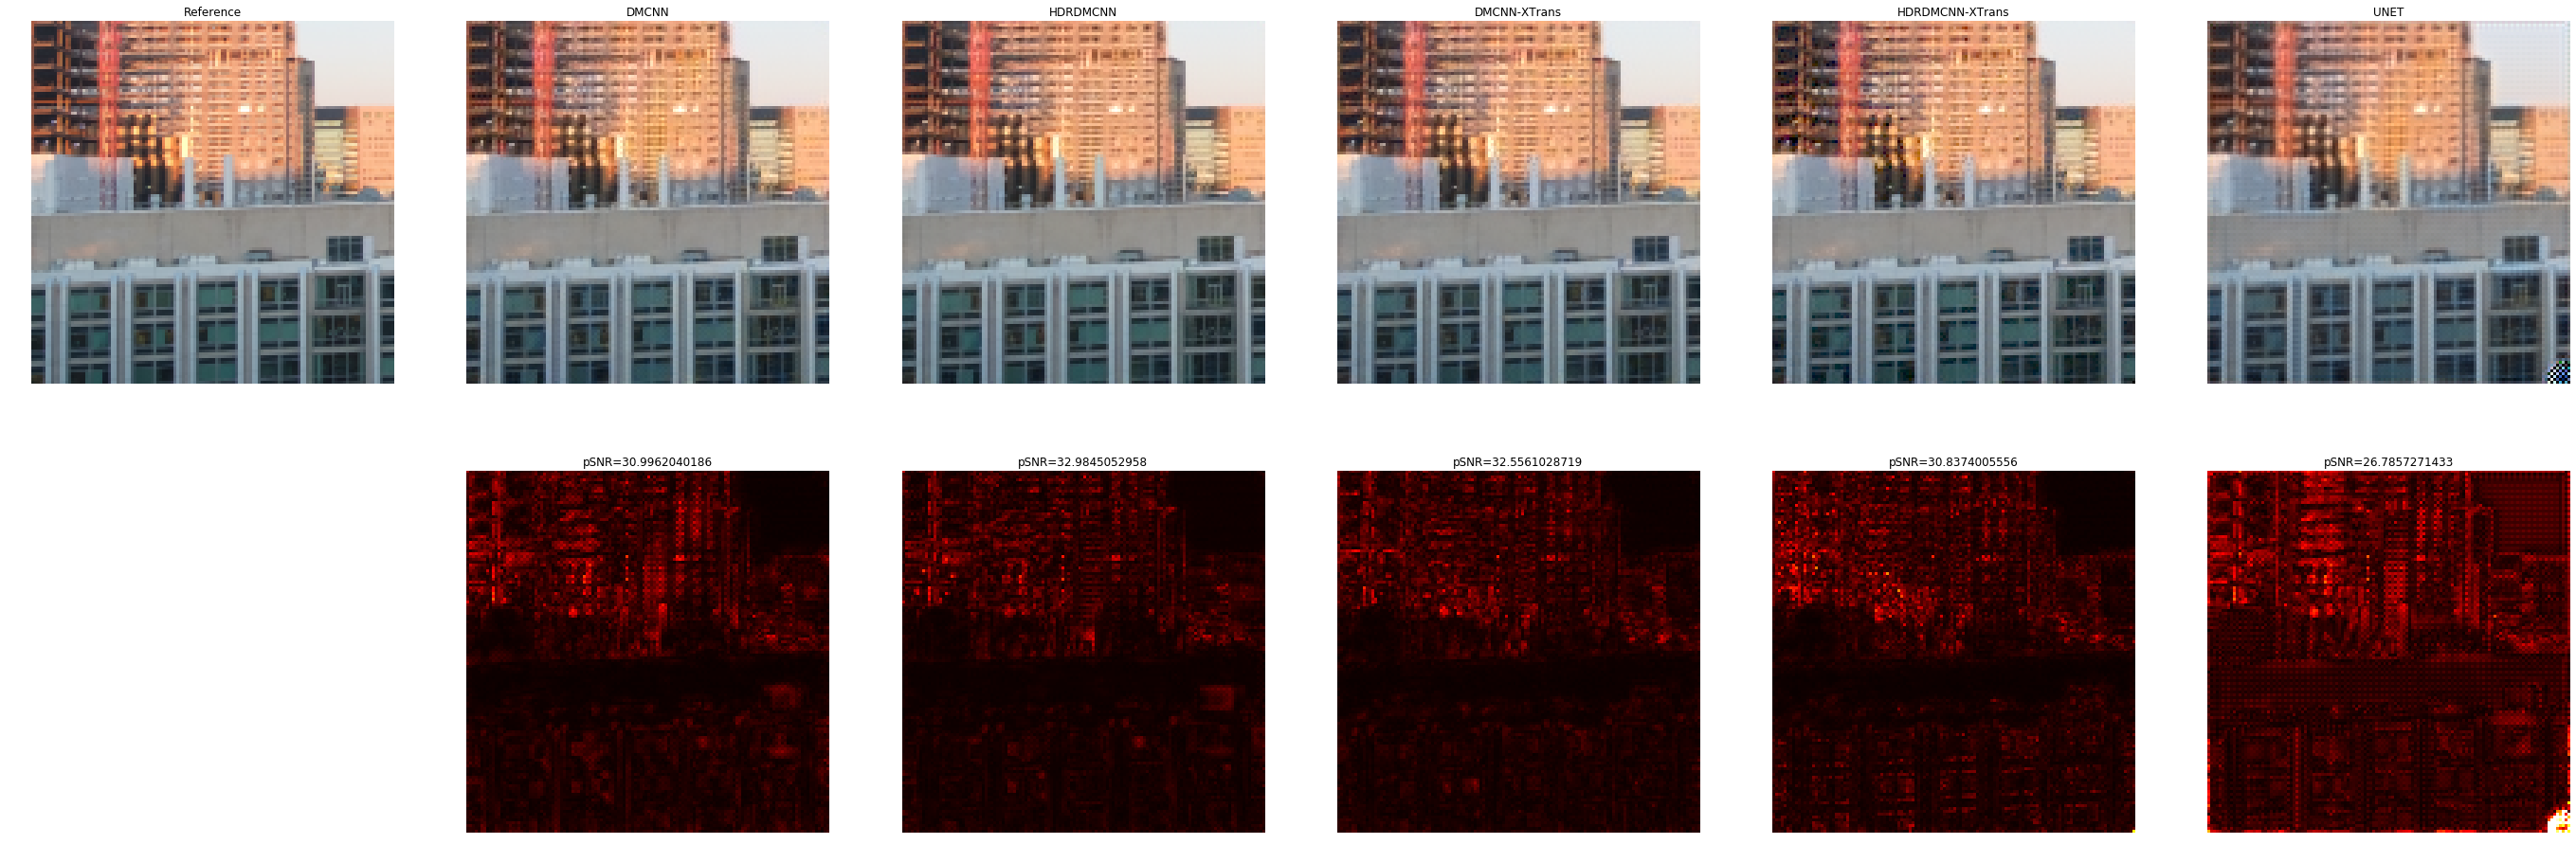

In [8]:
evaluateModel(models, "19440", im.readBinImg("19440ref.bin"))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


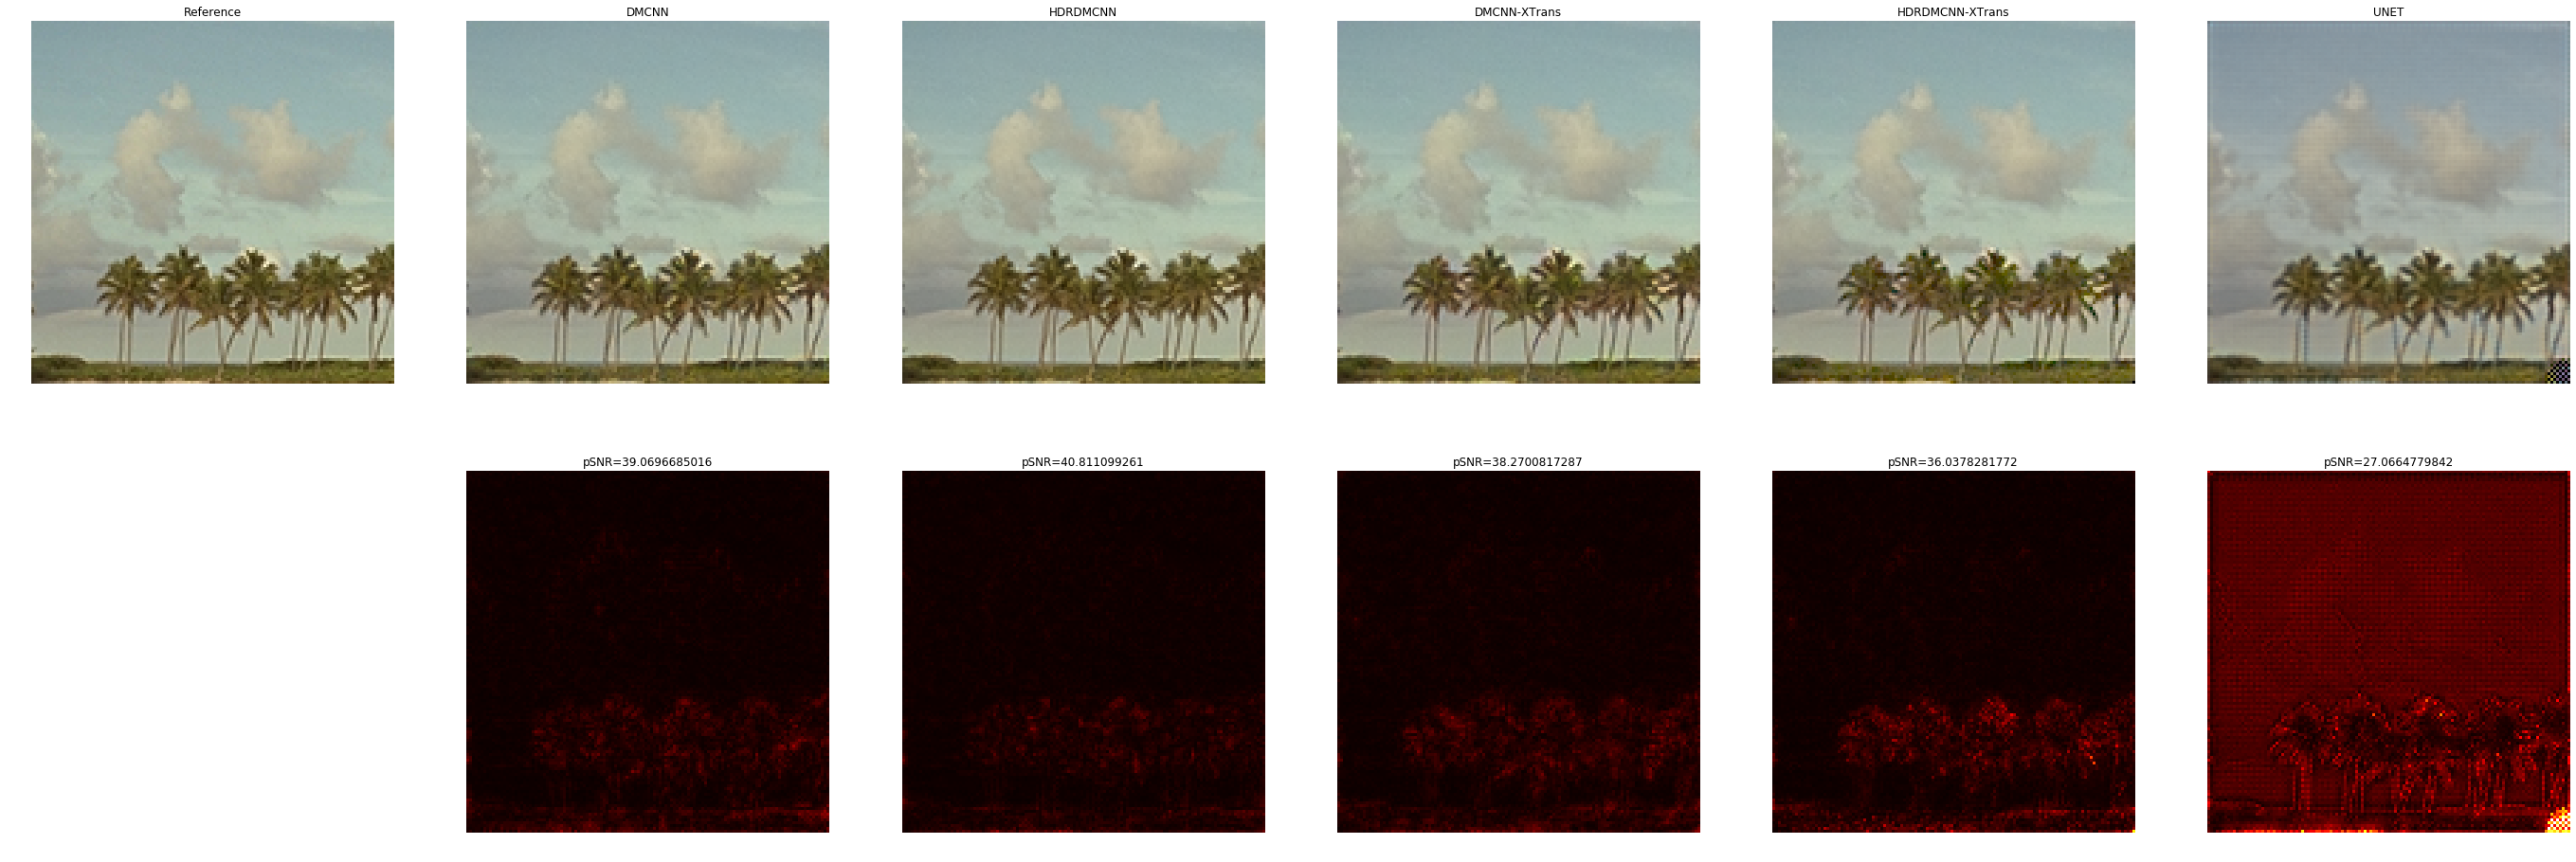

In [9]:
evaluateModel(models, "1528", im.readBinImg("1528ref.bin"))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


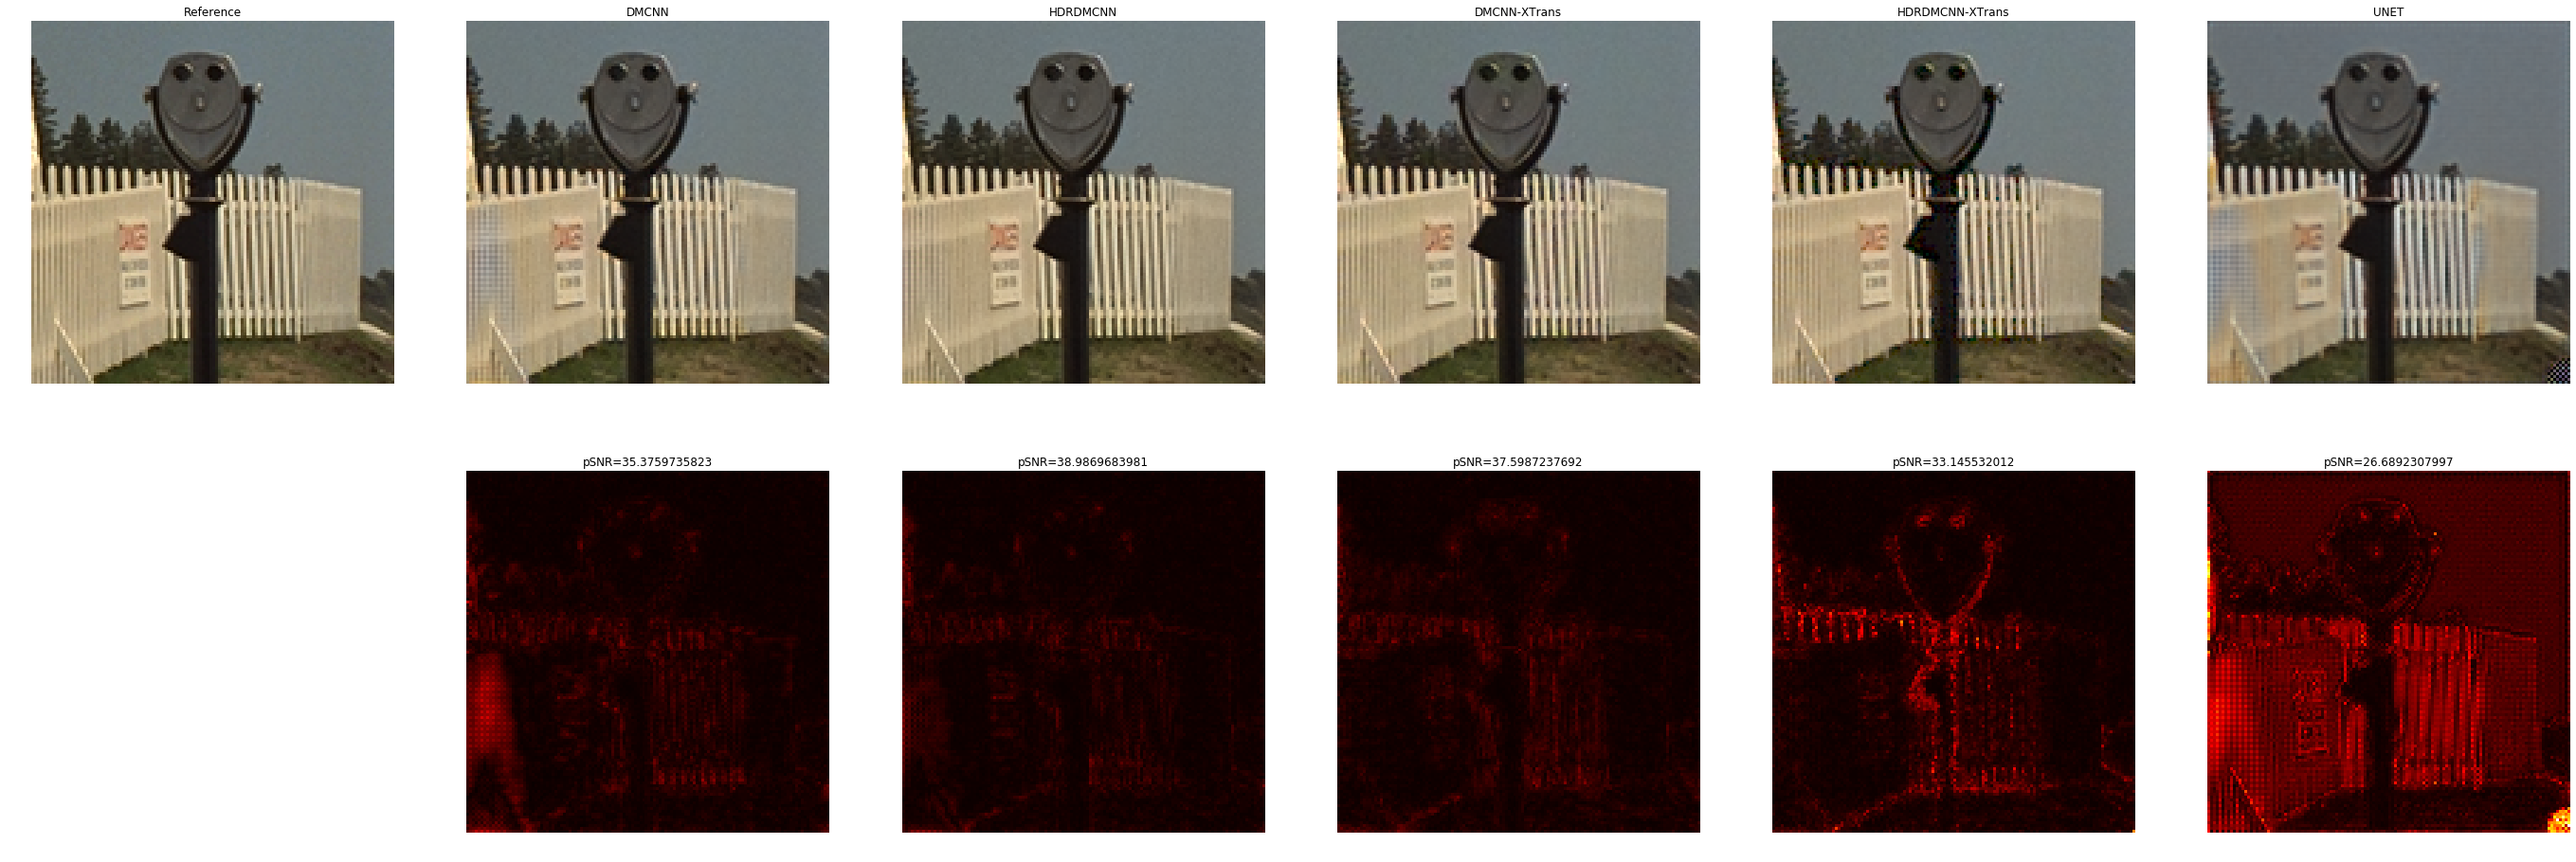

In [10]:
evaluateModel(models, "1756", im.readBinImg("1756ref.bin"))

In [11]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def grey(x):
    return x * 0.5 + 0.5
    
def visualizeFilter(model, layer_id):
    weights = model.layers[layer_id].get_weights()[0]

    print(weights.shape)
    
    xlen = 16
    if weights.shape[3] <= 16:
        xlen = 4
    ylen = int(weights.shape[3] / xlen)

    f, axarr = plt.subplots(ylen, xlen, sharex=True)
    f.subplots_adjust(hspace=0)
    # f.subplots_adjust(vspace=0)
    f.set_figheight(ylen)
    f.set_figwidth(xlen)

    for i in range(ylen):
        for j in range(xlen):
            axarr[i,j].imshow(sigmoid(weights[:,:,:,i * xlen + j]), interpolation='nearest')
            axarr[i,j].set_axis_off()

    plt.show()
    
def visualizeActivation(activations, layer_id):
    weights = activations[layer_id][0]

    print(weights.shape)
    
    xlen = 16
    if weights.shape[2] <= 16:
        xlen = 4
    ylen = int(weights.shape[2] / xlen)

    f, axarr = plt.subplots(ylen, xlen, sharex=True)
    f.subplots_adjust(hspace=0)
    # f.subplots_adjust(vspace=0)
    f.set_figheight(ylen * 5)
    f.set_figwidth(xlen * 5)

    for i in range(ylen):
        for j in range(xlen):
            axarr[i,j].imshow(weights[:,:,i * xlen + j], cmap='gray')
            axarr[i,j].set_axis_off()

    plt.savefig("Layer" + str(layer_id) + ".svg")

(9, 9, 3, 128)


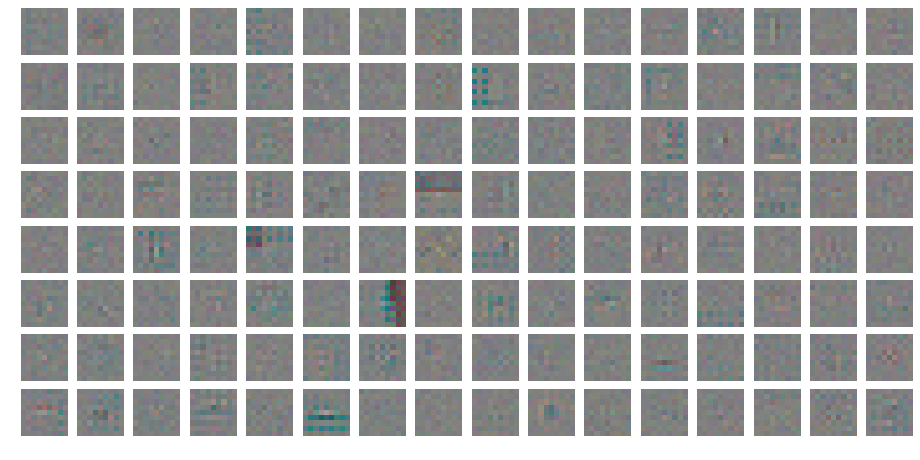

In [12]:
visualizeFilter(models[0], 1)

5
(128, 128, 128)


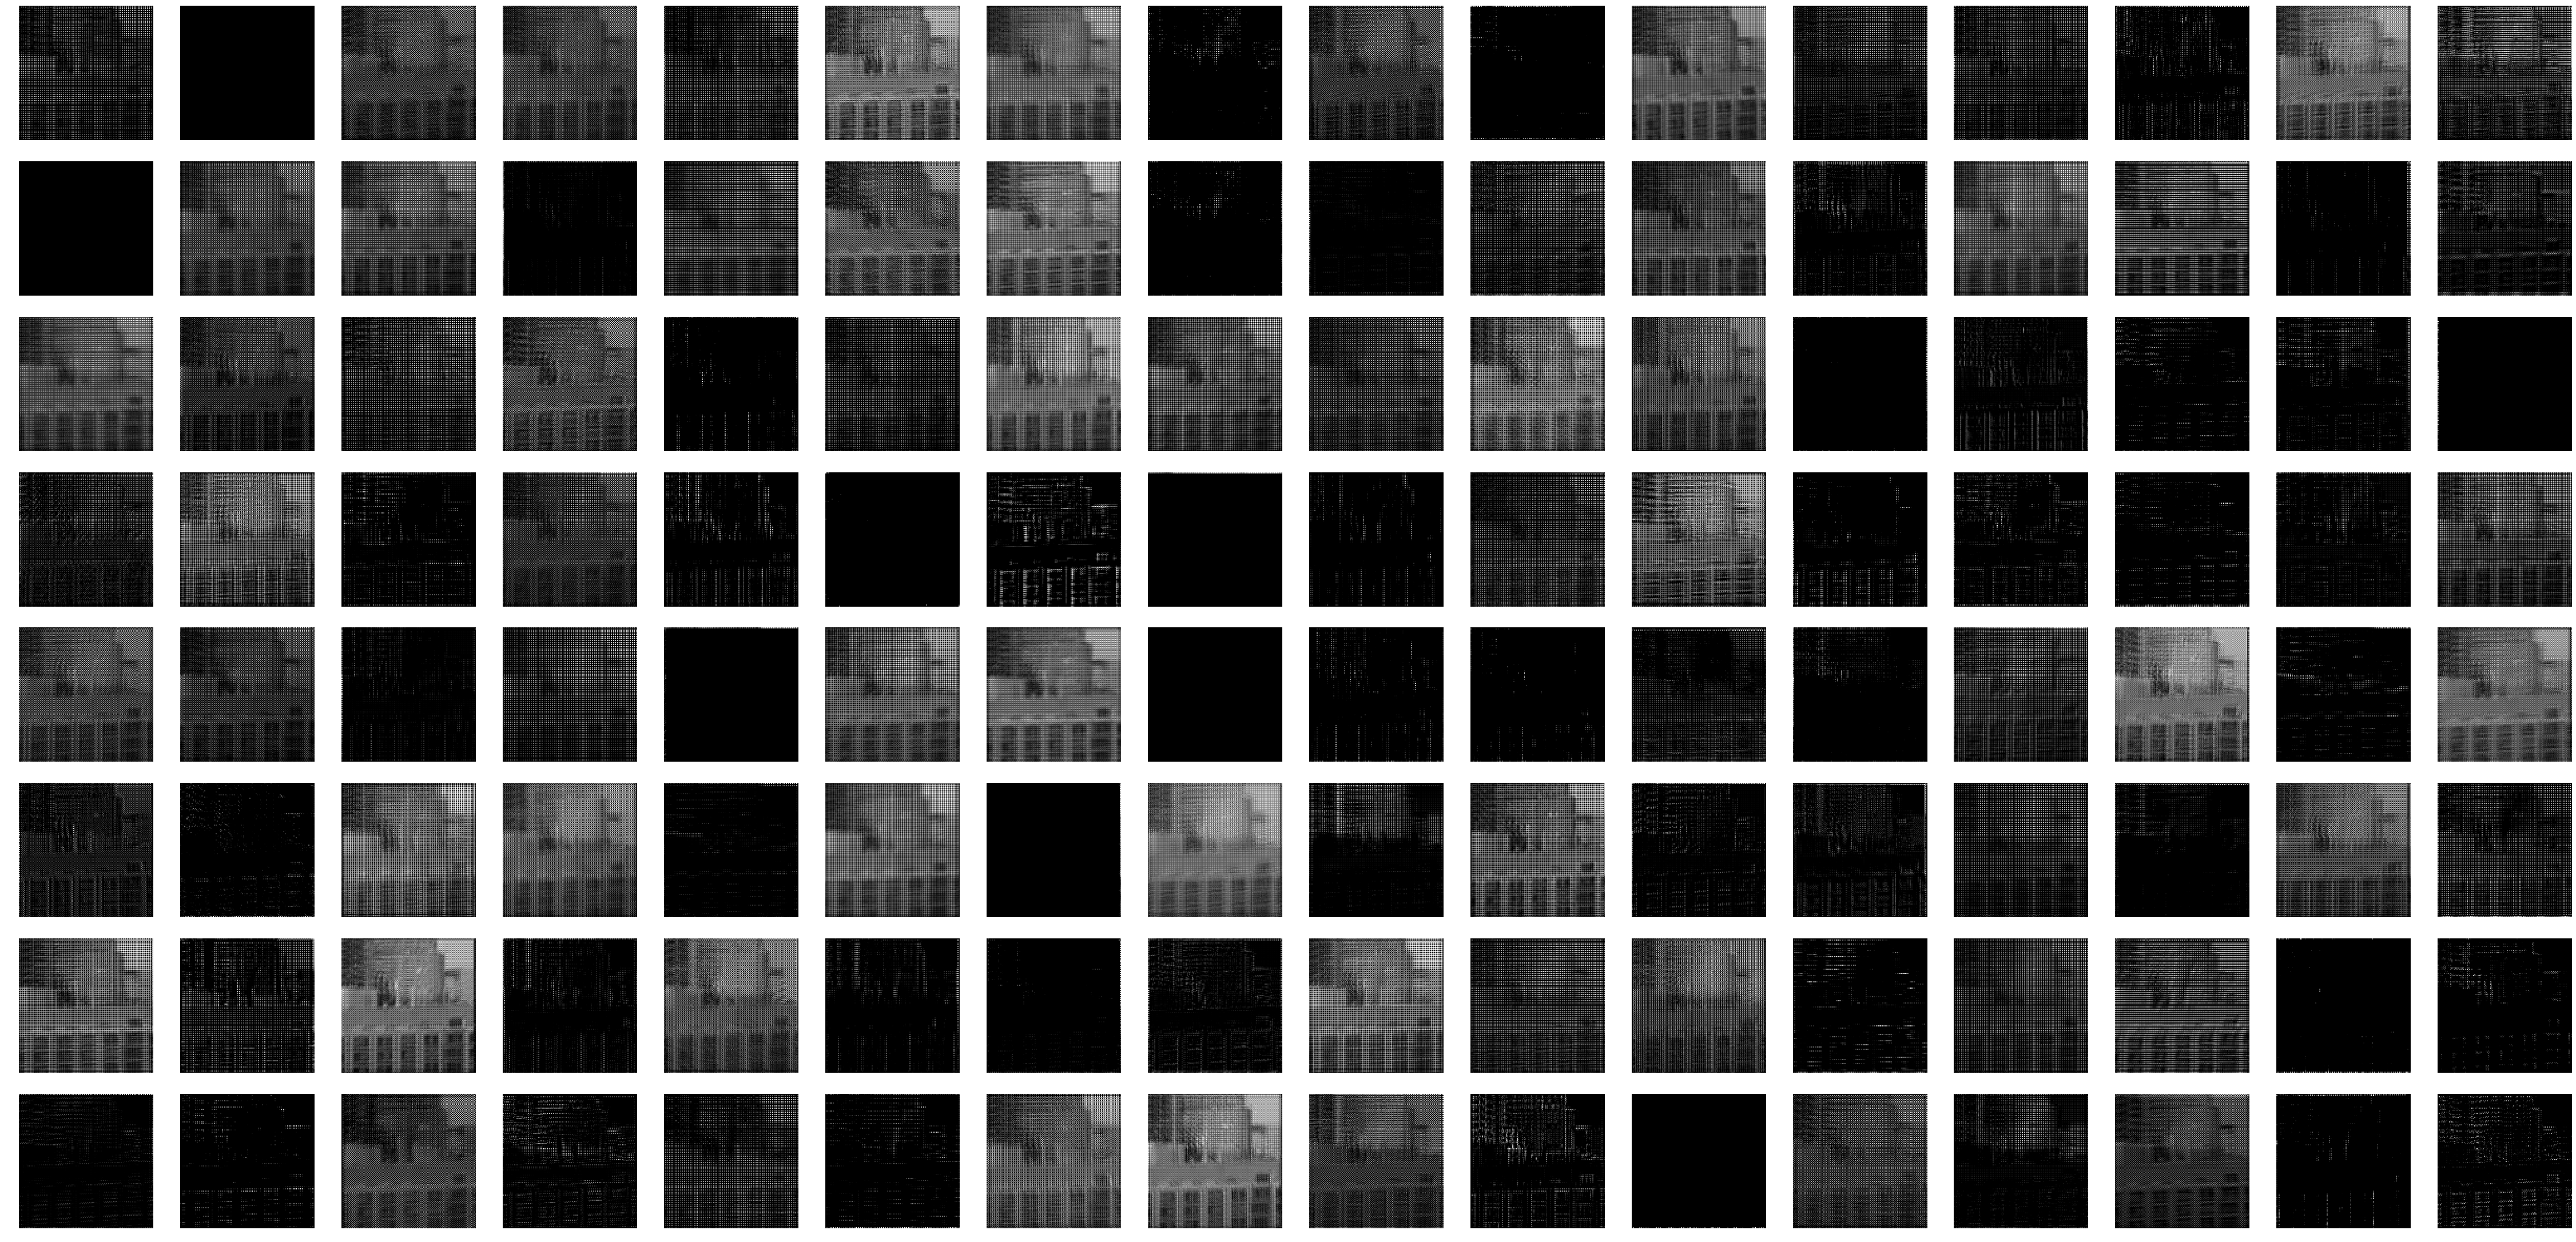

In [13]:
import keras.backend as K
from keras.models import Model

test = im.readBinImg("19440.bin")
ref = im.readBinImg("19440ref.bin")

layer_outputs = [layer.output for layer in models[0].layers]
activation_model = Model(inputs=models[0].input, outputs=layer_outputs)
activations = activation_model.predict(np.array([test]))

print(len(activations))

visualizeActivation(activations, 1)

Text(0.5, 1.0, 'B-(R+G)')

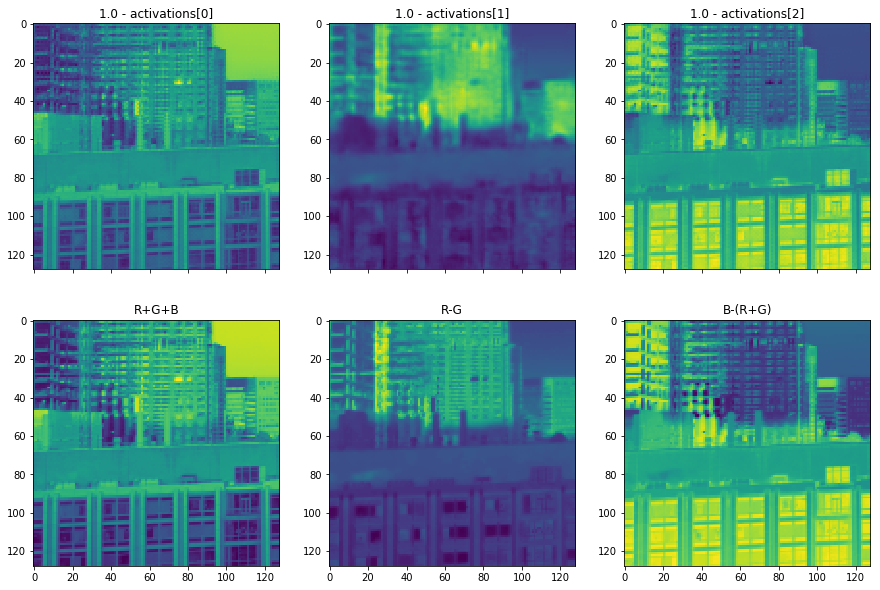

In [14]:
f, ax = plt.subplots(2, 3, sharex=True)
f.set_figheight(10)
f.set_figwidth(15)

ax[0,0].set_title("1.0 - activations[0]")
ax[0,0].imshow(1.0 - activations[3][0][:,:,0])
ax[1,0].imshow(ref[:,:,2] + ref[:,:,1] + ref[:,:,0])
ax[1,0].set_title("R+G+B")

ax[0,1].set_title("1.0 - activations[1]")
ax[0,1].imshow(1.0 - activations[3][0][:,:,1])
ax[1,1].imshow(ref[:,:,0] - ref[:,:,1])
ax[1,1].set_title("R-G")

ax[0,2].set_title("1.0 - activations[2]")
ax[0,2].imshow(1.0 - activations[3][0][:,:,2])
ax[1,2].imshow(ref[:,:,2]-(ref[:,:,1] + ref[:,:,0]))
ax[1,2].set_title("B-(R+G)")

5
(128, 128, 128)


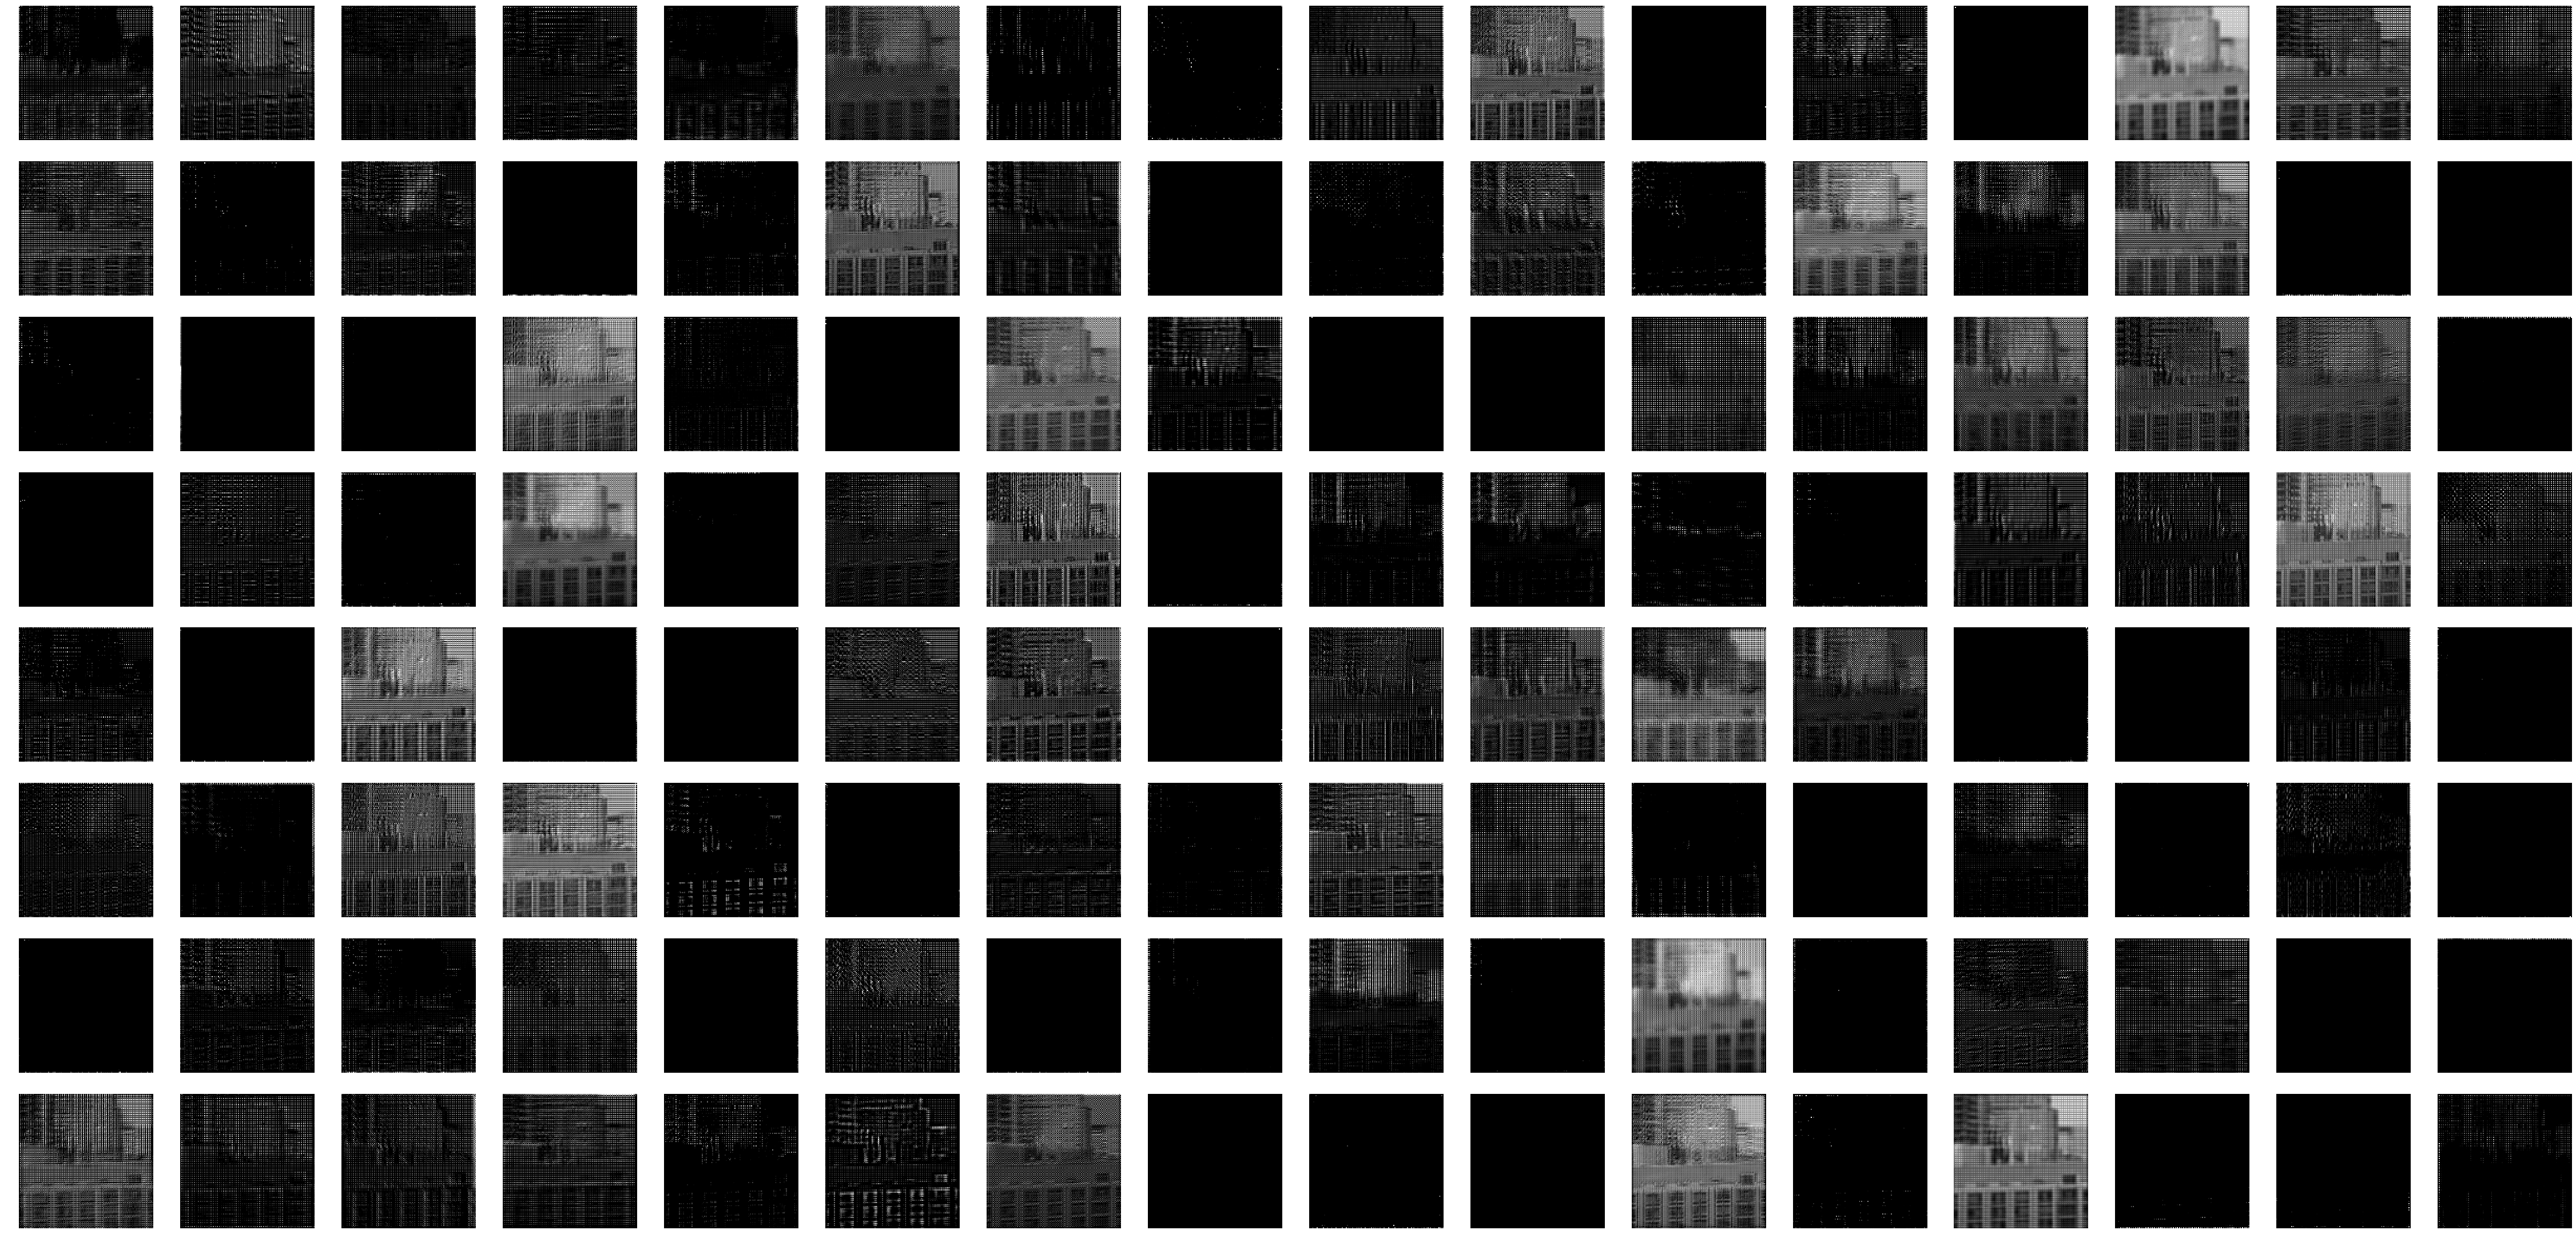

In [15]:
ref = im.readBinImg("19440ref.bin")

test = im.im2cfa(ref, im.cfa2rgb(im.bayer_cfa0, "SONY NEX-5N"))

layer_outputs = [layer.output for layer in models[2].layers]
activation_model = Model(inputs=models[2].input, outputs=layer_outputs)
activations = activation_model.predict(np.array([test]))

print(len(activations))

visualizeActivation(activations, 1)

Text(0.5, 1.0, 'B-(R+G)')

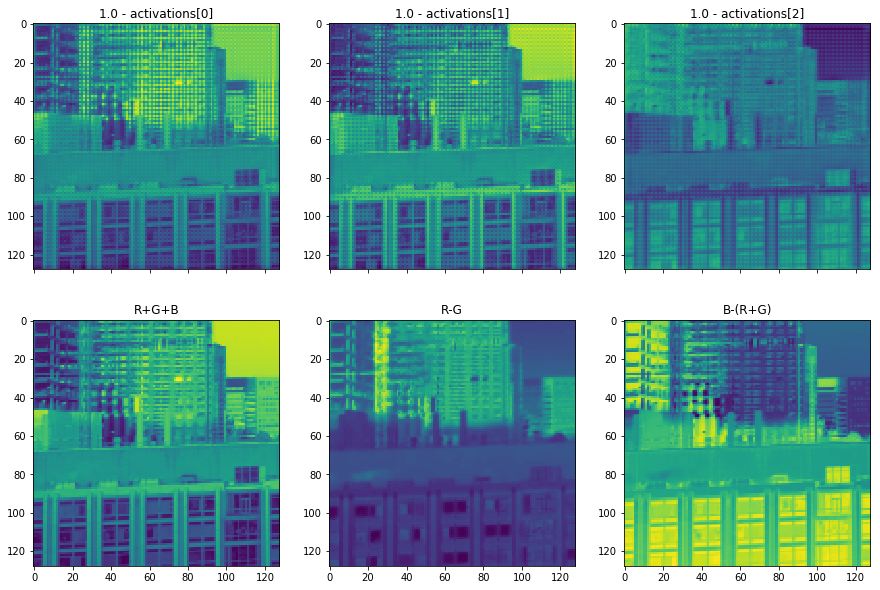

In [16]:
f, ax = plt.subplots(2, 3, sharex=True)
f.set_figheight(10)
f.set_figwidth(15)

ax[0,0].set_title("1.0 - activations[0]")
ax[0,0].imshow(1.0 - activations[3][0][:,:,0])
ax[1,0].imshow(ref[:,:,2] + ref[:,:,1] + ref[:,:,0])
ax[1,0].set_title("R+G+B")

ax[0,1].set_title("1.0 - activations[1]")
ax[0,1].imshow(1.0 - activations[3][0][:,:,1])
ax[1,1].imshow(ref[:,:,0] - ref[:,:,1])
ax[1,1].set_title("R-G")

ax[0,2].set_title("1.0 - activations[2]")
ax[0,2].imshow(1.0 - activations[3][0][:,:,2])
ax[1,2].imshow(ref[:,:,2]-(ref[:,:,1] + ref[:,:,0]))
ax[1,2].set_title("B-(R+G)")

(9, 9, 3, 128)


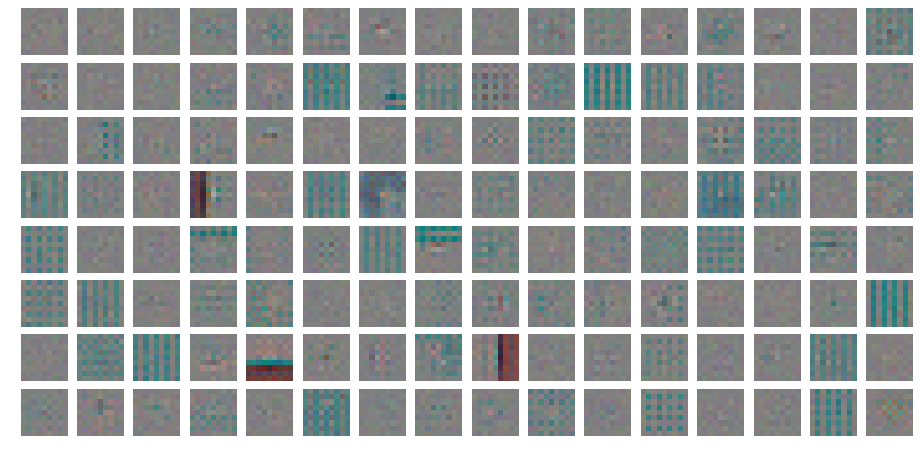

In [17]:
visualizeFilter(models[1], 1)

(9, 9, 3, 128)


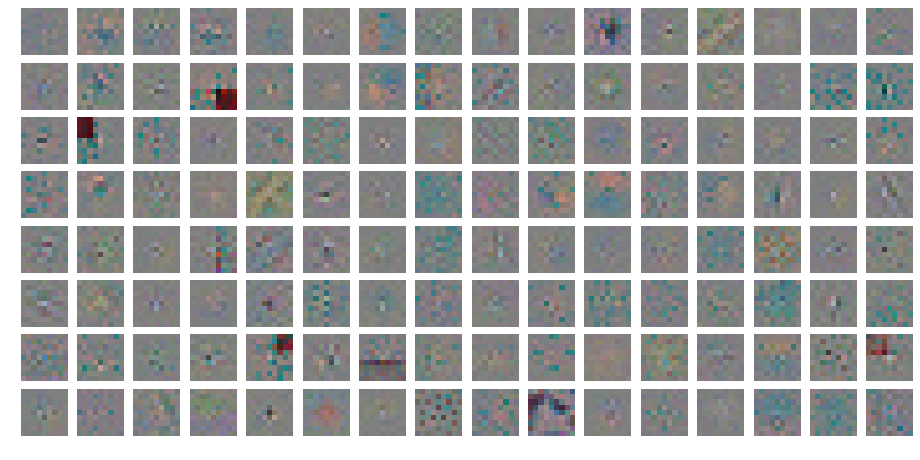

In [18]:
visualizeFilter(models[2], 1)

In [21]:
from os import walk
import time

def evaluateModel(models, directory):
    refs = []
    refdir = os.path.join(directory, "ref")
    for filename in os.listdir(refdir):
        if filename.endswith(".bin"):
            refpath = os.path.join(refdir, filename)
            refs.append(im.readBinImg(refpath))
    refs = np.array(refs)
    for i in range(0, len(models_name)):
        cfa = im.cfa2rgb(sensors_type[i], "SONY NEX-5N")
        if gamma[i] != 1.0:
            cfa = np.power(np.maximum(cfa, 0.0), gamma[i])
        raws = [im.im2cfa(np.power(img, gamma[i]), cfa) for img in refs]

        t0 = time.time()
        for tz in range(0, 10):
            results = models[i].predict(np.array(raws))
        t1 = time.time()
        
        print(models_name[i], ":", 10 * refs.size / 3 / (t1 - t0) / 1e6, "MPix/s")
        
        psnrs = []
        for j in range(0, len(results)):
            psnrs.append(calcPSNR(refs[0], np.power(results[0], 1.0 / gamma[i]))[0])
        print(models_name[i], ":", np.mean(psnrs))

evaluateModel(models, "D:\\NNPhotos\\Kodak\\Data\\SONY NEX-5N.FullRange")

DMCNN : 16.078959440453904 MPix/s
DMCNN : 37.5861416012
HDRDMCNN : 11.211808774581124 MPix/s
HDRDMCNN : 40.4354081303
DMCNN-XTrans : 15.728738750619991 MPix/s
DMCNN-XTrans : 37.4827990681
HDRDMCNN-XTrans : 11.201601306600818 MPix/s
HDRDMCNN-XTrans : 34.2813573033
UNET : 16.07668679647155 MPix/s
UNET : 28.4331545979
